# DataSet EDA and Feature Extraction
## There are 3 Datasets desciribing three tests on 4 bearings each in interval of 10 min/5min snapping shot 1 second vibrational data
### Prof.Vaibhav Shivhare MITS Gwalior
### Saransh Bairagi

In [156]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
from scipy import stats as st

In [12]:
datapath=os.path.join(os.getcwd(),"data")

In [21]:
datapath

'C:\\Users\\91626\\Desktop\\Research paper\\data'

In [41]:
# checking for path and first file
temppath=os.path.join(datapath,"2nd_test\\2004.02.12.10.32.39")

In [42]:
tempdata=pd.read_csv(temppath,sep='\t',header=None)

In [49]:
tempdata.tail()

,0,1,2,3
20475,0.049,-0.051,-0.039,-0.044
20476,0.037,0.061,0.115,0.007
20477,-0.012,0.007,0.056,-0.007
20478,-0.012,0.093,0.017,-0.044
20479,0.020,0.076,-0.042,-0.029


In [46]:
# list of all 4 bearings signals
l=[np.array(tempdata.iloc[:,i]) for i in range(4)]

In [48]:
l[0]

array([-0.049, -0.042,  0.015, ..., -0.012, -0.012,  0.02 ])

### It wont be feasible for train with such huge features with each timestamp so we wil minimuze it into 10 features
#### MAX,MIN,MEAN,std deviation,RMS,skewness,kurtosis,crustfactor,form factor,pearson coefficinet

In [54]:
feature_matrix=np.zeros((1,10))
feature_matrix

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [121]:
def skewness(x):
    n = len(x)
    third_moment = np.sum((x - np.mean(x))**3) / n
    s_3 = np.std(x, ddof = 1) ** 3
    return third_moment/s_3

In [123]:
def kurrosis(x):
    n = len(x)
    fourth_moment = np.sum((x - np.mean(x))**4) / n
    s_4 = np.std(x, ddof = 1) ** 4
    return fourth_moment / s_4 - 3

In [124]:
def pearsonc(x):
    return (np.mean(x)-st.mode(x)[0])/np.std(x,ddof=1)

In [125]:
feature_matrix[0,0]=np.max(l[0])
feature_matrix[0,1]=np.min(l[0])
feature_matrix[0,2]=np.mean(l[0])
feature_matrix[0,3]=np.std(l[0],ddof=1)
feature_matrix[0,4]=np.sqrt(np.mean(l[0]**2))
feature_matrix[0,5]=skewness(l[0])
feature_matrix[0,6]=kurrosis(l[0])
feature_matrix[0,7]=feature_matrix[0,0]/feature_matrix[0,4]
feature_matrix[0,8]=feature_matrix[0,4]/feature_matrix[0,2]
feature_matrix[0,9]=pearsonc(l[0])

In [126]:
feature_matrix

array([[ 0.454     , -0.386     , -0.010196  ,  0.07347672,  0.074179  ,
         0.08398728,  0.62840828,  6.12033067, -7.27530669, -0.04349671]])

In [127]:
df=pd.DataFrame(feature_matrix)
df.index=["2004.02.12.10.32"]

In [128]:
df

,0,1,2,3,4,5,6,7,8,9
2004.02.12.10.32,0.454,-0.386,-0.010196,0.073477,0.074179,0.083987,0.628408,6.120331,-7.275307,-0.043497


In [129]:
 datapath


'C:\\Users\\91626\\Desktop\\Research paper\\data'

In [130]:
# Creating for 1st bearing Timefeature Dataframe 
#in test2

In [131]:
secondtestfilespath=(os.path.join(datapath,"2nd_test"))

In [138]:
def savefile(bearingn,testn,matrix):
    matrix.to_csv(f'Time_feature_matrix_Bearing_{bearingn}_Test_{testn}.csv')

In [140]:
for bearingno in range(1,5):
    Time_feature_matrix=pd.DataFrame()
    for filename in os.listdir(secondtestfilespath):
        dataset=pd.read_csv(os.path.join(secondtestfilespath,filename),sep="\t",header=None)
        bearing_data=np.array(dataset.iloc[:,bearingno-1])
        feature_matrix=np.zeros((1,10))
        temp=bearing_data
        feature_matrix[0,0]=np.max(temp)
        feature_matrix[0,1]=np.min(temp)
        feature_matrix[0,2]=np.mean(temp)
        feature_matrix[0,3]=np.std(temp,ddof=1)
        feature_matrix[0,4]=np.sqrt(np.mean(temp**2))
        feature_matrix[0,5]=skewness(temp)
        feature_matrix[0,6]=kurrosis(temp)
        feature_matrix[0,7]=feature_matrix[0,0]/feature_matrix[0,4]
        feature_matrix[0,8]=feature_matrix[0,4]/feature_matrix[0,2]
        feature_matrix[0,9]=pearsonc(temp)
        df=pd.DataFrame(feature_matrix)
        df.index=[filename[:-3]]
        Time_feature_matrix=Time_feature_matrix._append(df)
    Time_feature_matrix.columns=['Max','Min','Mean','Std','RMS','Skewness',"Kurtosis","Crest Factor","Form Factor","Pearson Coefficient"]
    Time_feature_matrix.index = pd.to_datetime(Time_feature_matrix.index, format='%Y.%m.%d.%H.%M')
    Time_feature_matrix = Time_feature_matrix.sort_index()
    savefile(bearingno,2,Time_feature_matrix)

In [136]:
Time_feature_matrix.head()

,0,1,2,3,4,5,6,7,8,9
2004.02.12.10.32,0.454,-0.386,-0.010196,0.073477,0.074179,0.083987,0.628408,6.120331,-7.275307,-0.043497
2004.02.12.10.42,0.369,-0.388,-0.002585,0.075340,0.075382,0.052138,0.647935,4.895038,-29.161382,-0.127223
2004.02.12.10.52,0.503,-0.400,-0.002484,0.076191,0.076230,0.032806,0.513132,6.598472,-30.688508,-0.124476
2004.02.12.11.02,0.608,-0.576,-0.002277,0.078693,0.078724,0.041483,1.157547,7.723217,-34.579322,0.123562
2004.02.12.11.12,0.391,-0.391,-0.002404,0.078439,0.078474,0.028222,0.602825,4.982524,-32.645152,0.058595


In [137]:
Time_feature_matrix.columns=['Max','Min','Mean','Std','RMS','Skewness',"Kurtosis","Crest Factor","Form Factor","Pearson Coefficient"]
Time_feature_matrix.index = pd.to_datetime(Time_feature_matrix.index, format='%Y.%m.%d.%H.%M')

Time_feature_matrix = Time_feature_matrix.sort_index()
Time_feature_matrix

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor,Pearson Coefficient
2004-02-12 10:32:00,0.454,-0.386,-0.010196,0.073477,0.074179,0.083987,0.628408,6.120331,-7.275307,-0.043497
2004-02-12 10:42:00,0.369,-0.388,-0.002585,0.075340,0.075382,0.052138,0.647935,4.895038,-29.161382,-0.127223
2004-02-12 10:52:00,0.503,-0.400,-0.002484,0.076191,0.076230,0.032806,0.513132,6.598472,-30.688508,-0.124476
2004-02-12 11:02:00,0.608,-0.576,-0.002277,0.078693,0.078724,0.041483,1.157547,7.723217,-34.579322,0.123562
2004-02-12 11:12:00,0.391,-0.391,-0.002404,0.078439,0.078474,0.028222,0.602825,4.982524,-32.645152,0.058595
...,...,...,...,...,...,...,...,...,...,...
2004-02-19 05:42:00,4.998,-5.000,-0.002752,0.725014,0.725001,-0.510519,12.576183,6.893779,-263.426419,0.059651
2004-02-19 05:52:00,2.688,-2.881,-0.004487,0.462001,0.462012,-0.325344,3.759312,5.818035,-102.977656,-0.152568
2004-02-19 06:02:00,3.501,-3.696,-0.001703,0.483844,0.483835,-0.377068,4.890985,7.235932,-284.094983,-0.179196
2004-02-19 06:12:00,0.005,0.000,0.001857,0.000987,0.002103,0.579656,3.636864,2.377543,1.132578,-0.144998


# Important thing to note that in test-2 The fault was found in Bearing-1 and it was Outer Race Failure

In [150]:
# df1=pd.read_csv("Time_feature_matrix_Bearing_1_Test_2.csv")
df1=pd.read_csv("Time_feature_matrix_Bearing_1_Test_2.csv",index_col="Unnamed: 0")
df1.index=pd.to_datetime(df1.index)

In [151]:
df1

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor,Pearson Coefficient
2004-02-12 10:32:00,0.454,-0.386,-0.010196,0.073477,0.074179,0.083987,0.628408,6.120331,-7.275307,-0.043497
2004-02-12 10:42:00,0.369,-0.388,-0.002585,0.075340,0.075382,0.052138,0.647935,4.895038,-29.161382,-0.127223
2004-02-12 10:52:00,0.503,-0.400,-0.002484,0.076191,0.076230,0.032806,0.513132,6.598472,-30.688508,-0.124476
2004-02-12 11:02:00,0.608,-0.576,-0.002277,0.078693,0.078724,0.041483,1.157547,7.723217,-34.579322,0.123562
2004-02-12 11:12:00,0.391,-0.391,-0.002404,0.078439,0.078474,0.028222,0.602825,4.982524,-32.645152,0.058595
...,...,...,...,...,...,...,...,...,...,...
2004-02-19 05:42:00,4.998,-5.000,-0.002752,0.725014,0.725001,-0.510519,12.576183,6.893779,-263.426419,0.059651
2004-02-19 05:52:00,2.688,-2.881,-0.004487,0.462001,0.462012,-0.325344,3.759312,5.818035,-102.977656,-0.152568
2004-02-19 06:02:00,3.501,-3.696,-0.001703,0.483844,0.483835,-0.377068,4.890985,7.235932,-284.094983,-0.179196
2004-02-19 06:12:00,0.005,0.000,0.001857,0.000987,0.002103,0.579656,3.636864,2.377543,1.132578,-0.144998


In [153]:
df1=pd.read_csv("Time_feature_matrix_Bearing_1_Test_2.csv",index_col="Unnamed: 0")
df2=pd.read_csv("Time_feature_matrix_Bearing_2_Test_2.csv",index_col="Unnamed: 0")
df3=pd.read_csv("Time_feature_matrix_Bearing_3_Test_2.csv",index_col="Unnamed: 0")
df4=pd.read_csv("Time_feature_matrix_Bearing_4_Test_2.csv",index_col="Unnamed: 0")

# Visualizing Data for Better Understanding of features and dropping them down if not suitable

In [154]:
df1.columns

Index(['Max', 'Min', 'Mean', 'Std', 'RMS', 'Skewness', 'Kurtosis',
       'Crest Factor', 'Form Factor', 'Pearson Coefficient'],
      dtype='object')

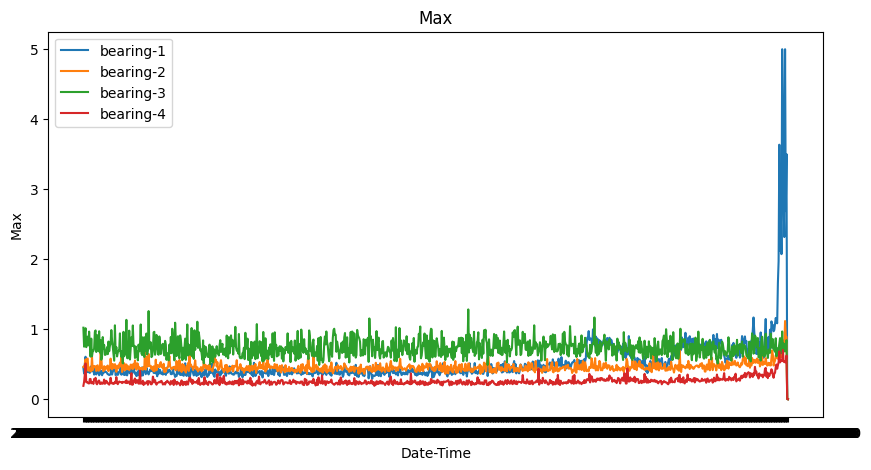

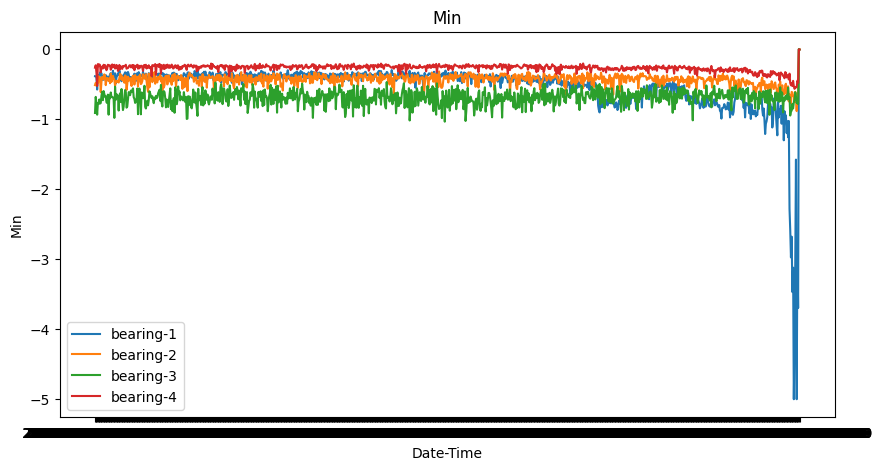

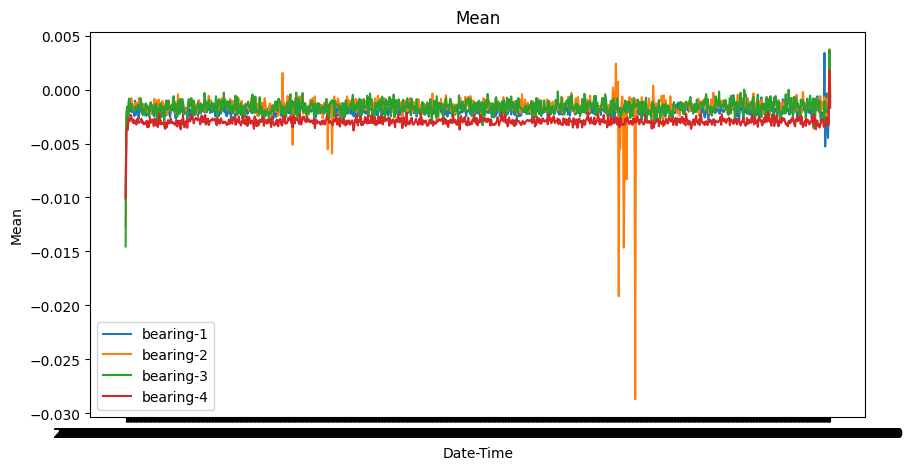

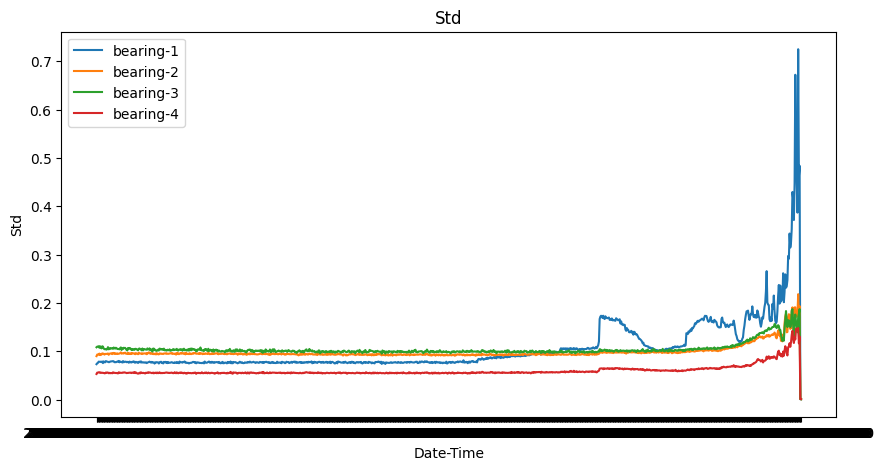

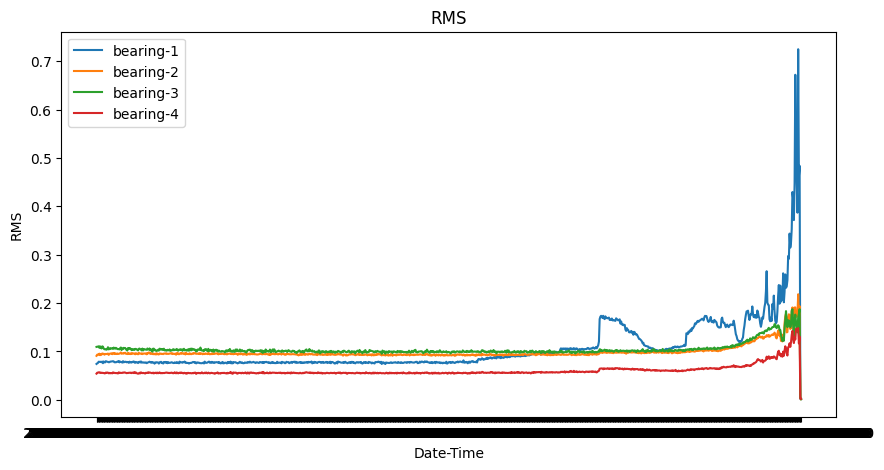

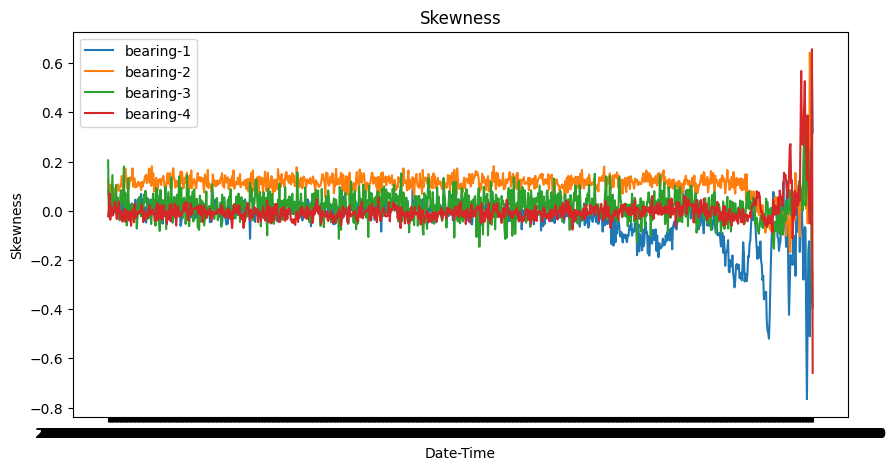

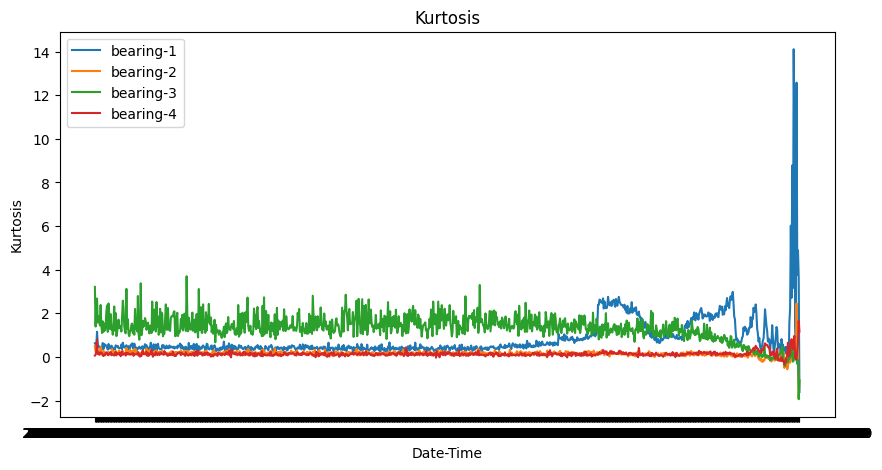

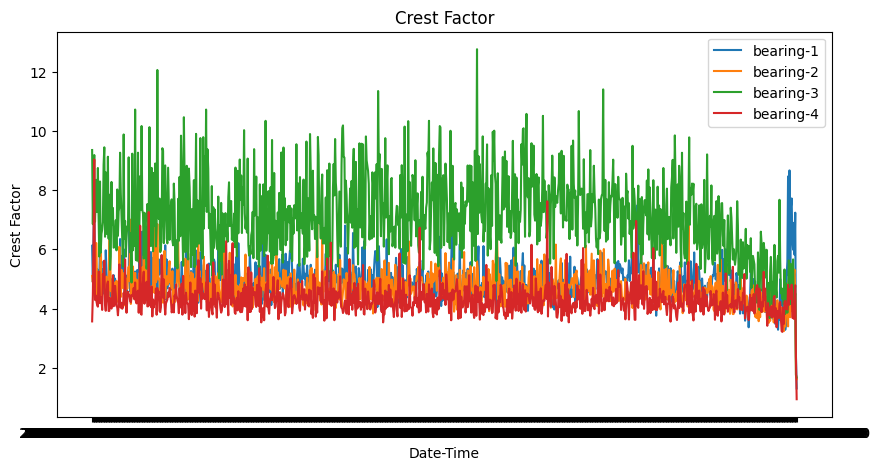

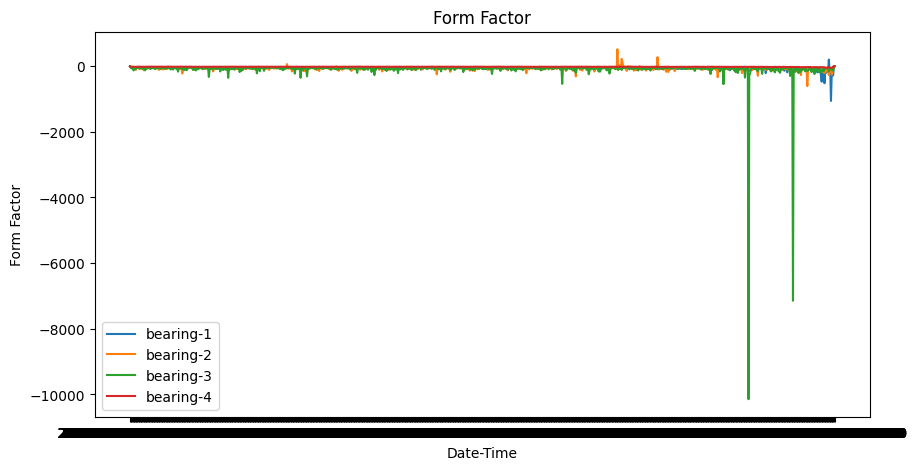

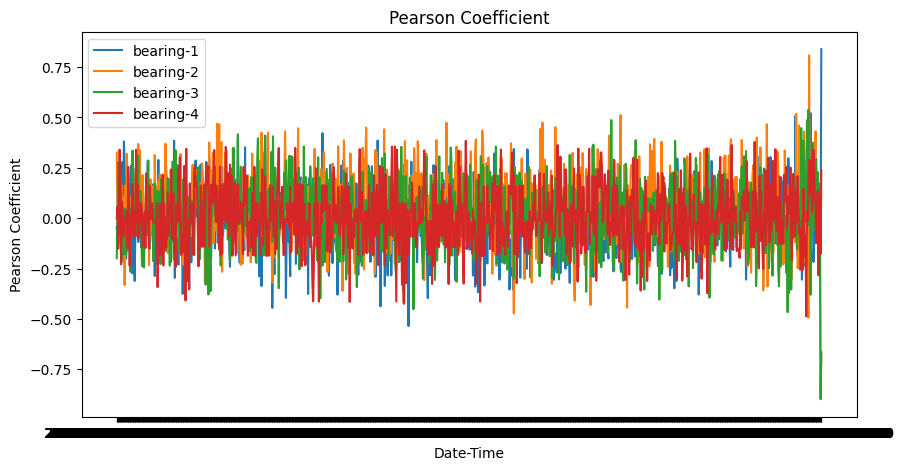

In [157]:
for col in df1.columns:
    plt.figure(figsize=(10,5))
    plt.plot(df1.index,df1[col])
    plt.plot(df1.index,df2[col])
    plt.plot(df1.index,df3[col])
    plt.plot(df1.index,df4[col])
    plt.legend(['bearing-1','bearing-2','bearing-3','bearing-4'])
    plt.xlabel('Date-Time')
    plt.ylabel(col)
    plt.title(col)
    plt.show()